# Comparing investment between Amazon and Microsoft for 2019 using Sharpe Ratio.

An investment may make sense if we expect it to return more money than it costs. But returns are only part of the story because they are risky - there may be a range of possible outcomes. How does one compare different investments that may deliver similar results on average, but exhibit different levels of risks? \n

The best measure to comapre two investments apple to apple with different return and risk is **Sharpe Ratio**.It compares the expected returns for two investment opportunities and calculates the additional return per unit of risk an investor could obtain by choosing one over the other. In particular, it looks at the difference in returns for two investments and compares the average difference to the standard deviation (as a measure of risk) of this difference. A higher Sharpe ratio means that the reward will be higher for a given amount of risk. It is common to compare a specific opportunity against a benchmark that represents an entire category of investments. \n

The Sharpe ratio is usually calculated for a portfolio and uses the risk-free interest rate as benchmark. The standard risk free interest rate is 3-month Treasury Bill Rate. Here, to make things easier I will consider S&P 500 as my risk free rate (Benchmark) and instead of entier portfolio I will just consider Amazon and Microsoft Share prices.


In [35]:
# Reading the data 
benchmark_data=pd.read_csv('SNP500.csv', parse_dates=['Date'], index_col=['Date']).dropna()
MSFT=pd.read_csv('MSFT.csv',parse_dates=['Date'], index_col=['Date']).dropna()
AMZN=pd.read_csv('AMZN.csv',parse_dates=['Date'], index_col=['Date']).dropna()

In [36]:
# Combining MSFT and AMZN into stock data
combined_data=pd.merge(MSFT,AMZN,suffixes=['_MSFT','_AMZN'],on=['Date'])
combined_data.head()

,Open_MSFT,High_MSFT,Low_MSFT,Close_MSFT,Adj Close_MSFT,Volume_MSFT,Open_AMZN,High_AMZN,Low_AMZN,Close_AMZN,Adj Close_AMZN,Volume_AMZN
Date,,,,,,,,,,,,
2018-12-13,109.580002,110.870003,108.629997,109.449997,107.855240,31333400,1680.000000,1692.119995,1641.500000,1658.380005,1658.380005,5271300
2018-12-14,108.250000,109.260002,105.500000,106.029999,104.485077,47043100,1638.000000,1642.569946,1585.000000,1591.910034,1591.910034,6367200
2018-12-17,105.410004,105.800003,101.709999,102.889999,101.390823,56957300,1566.000000,1576.130005,1505.010010,1520.910034,1520.910034,8829800
2018-12-18,103.750000,104.510002,102.519997,103.970001,102.455093,49319200,1540.000000,1567.550049,1523.010010,1551.479980,1551.479980,6523000
2018-12-19,103.650002,106.879997,101.349998,103.690002,102.179176,68198200,1543.050049,1584.530029,1483.180054,1495.079956,1495.079956,8792200


In [37]:
# Lets just consider daily closing data for Amazon and Microsoft, also for the benchmark.
#stock data contains Amazon and Microsoft daily share prices
stock_data=combined_data[['Close_AMZN','Close_MSFT']]
stock_data.columns=['AMZN','MSFT']
print(stock_data.head())


                   AMZN        MSFT
Date                               
2018-12-13  1658.380005  109.449997
2018-12-14  1591.910034  106.029999
2018-12-17  1520.910034  102.889999
2018-12-18  1551.479980  103.970001
2018-12-19  1495.079956  103.690002


In [38]:
#Benchmark contains S and P 500 daily index

benchmark_data=benchmark_data[['Close']]
benchmark_data.columns=['S&P 500']
print(benchmark_data.head())

                S&P 500
Date                   
2018-12-13  2650.540039
2018-12-14  2599.949951
2018-12-17  2545.939941
2018-12-18  2546.159912
2018-12-19  2506.959961


##  A first glance at the data

Let's take a look the data to find out how many obeservations we have at our disposal


In [50]:
# Display summary for stock_data
print('Stocks\n')
print(stock_data.info())
print(stock_data.head())
# Display summary for benchmark_data
print('\nBenchmarks\n')
print(benchmark_data.info())
print(benchmark_data.head())


Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-12-13 to 2019-12-13
Data columns (total 2 columns):
AMZN    253 non-null float64
MSFT    253 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB
None
                   AMZN        MSFT
Date                               
2018-12-13  1658.380005  109.449997
2018-12-14  1591.910034  106.029999
2018-12-17  1520.910034  102.889999
2018-12-18  1551.479980  103.970001
2018-12-19  1495.079956  103.690002

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-12-13 to 2019-12-13
Data columns (total 1 columns):
S&P 500    253 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB
None
                S&P 500
Date                   
2018-12-13  2650.540039
2018-12-14  2599.949951
2018-12-17  2545.939941
2018-12-18  2546.159912
2018-12-19  2506.959961


##  Plot & summarize daily prices for Amazon and Microsoft
Before we compare an investment in either Microsoft or Amazon with the index of the 500 largest companies in the US, let's visualize the data, so we better understand what we're dealing with.


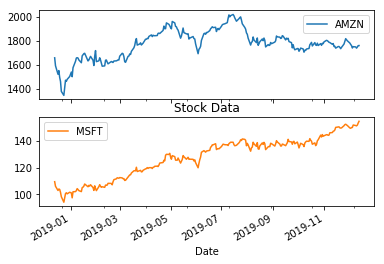

,AMZN,MSFT
count,253.000000,253.000000
mean,1774.110750,127.883202
std,120.074416,14.942388
min,1343.959961,94.129997
25%,1712.359985,116.769997
50%,1779.989990,132.600006
75%,1847.329956,138.429993
max,2020.989990,154.529999


In [40]:
# visualize the stock_data
stock_data.plot(subplots=True)
plt.title('Stock Data', )
plt.show()
# summarize the stock_data
stock_data.describe()


## Visualize & summarize daily values for the S&P 500

Let's also take a closer look at the value of the S&P 500, our benchmark.



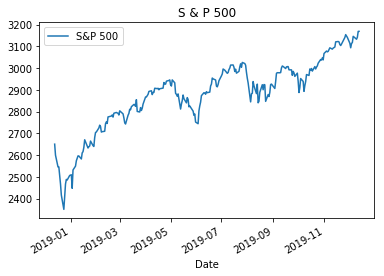

,S&P 500
count,253.000000
mean,2880.705645
std,160.667557
min,2351.100098
25%,2798.360107
50%,2905.030029
75%,2990.409912
max,3168.800049


In [41]:
# plot the benchmark_data
benchmark_data.plot()
plt.title('S & P 500')
plt.show()

# summarize the benchmark_data
benchmark_data.describe()

##  Let's calculate Daily Stock Returns

To calculate **Sharepe Ratio** we requires returns between 2 investment opportunities under consideration.

Our data show the historical value of each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next. We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio

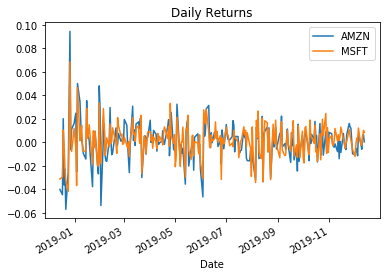

             AMZN        MSFT
count  252.000000  252.000000
mean     0.000375    0.001468
std      0.016597    0.014029
min     -0.057077   -0.041739
25%     -0.007832   -0.005519
50%      0.001072    0.001379
75%      0.008979    0.009324
max      0.094452    0.068310


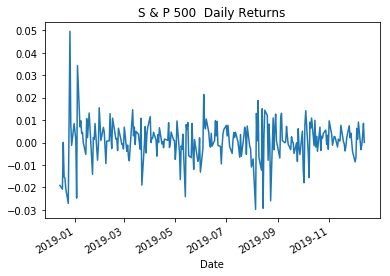

count    252.000000
mean       0.000750
std        0.009039
min       -0.029778
25%       -0.002855
50%        0.000942
75%        0.006200
max        0.049594
Name: S&P 500, dtype: float64


In [44]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
stock_returns.plot()
plt.title('Daily Returns')
plt.show()


# summarize the daily returns
print(stock_returns.describe())

# calculate daily benchmark_data returns
sp_returns = benchmark_data['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot()
plt.title('S & P 500  Daily Returns')
plt.show()

# summarize the daily returns
print(sp_returns.describe())


##  Calculating Excess Returns for Amazon and Microsoft vs. S&P 500

Next input in **Sharpe Ratio** is excess returns.\n

we need to calculate the relative performance of stocks vs. the S&P 500 benchmark. This is calculated as the difference in returns between stock_returns and sp_returns for each day.


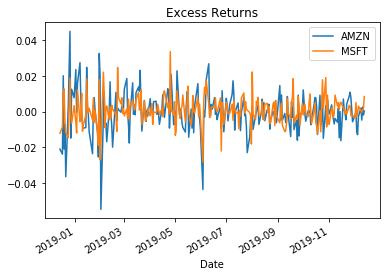

             AMZN        MSFT
count  252.000000  252.000000
mean    -0.000375    0.000718
std      0.011018    0.007937
min     -0.054717   -0.028283
25%     -0.005755   -0.003430
50%     -0.000317    0.000803
75%      0.004084    0.004591
max      0.044859    0.033486


In [45]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns,axis=0)

# plot the excess_returns
excess_returns.plot()
plt.title('Excess Returns')
plt.show()

# summarize the excess_returns
print(excess_returns.describe())


## The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500

Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the excess_returns. This tells us how much more or less the investment yields per day compared to the benchmark.


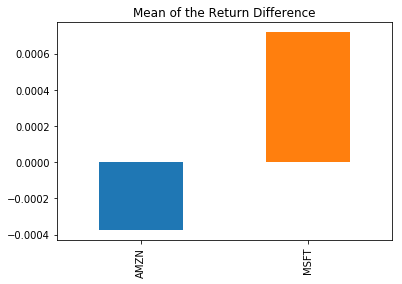

In [46]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar()
plt.title('Mean of the Return Difference')
plt.show()


## The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference

It looks like there was quite a bit of a difference between average daily returns for Amazon and Microsoft.

Next, we calculate the standard deviation of the excess_returns. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500.


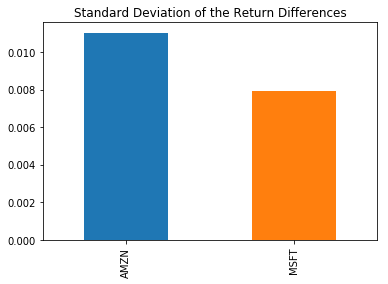

In [48]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar()
plt.title('Standard Deviation of the Return Differences')
plt.show()


##  Putting it all together
Now we just need to compute the ratio of avg_excess_returns and sd_excess_returns. The result is now finally the Sharpe ratio and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.

The Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √253


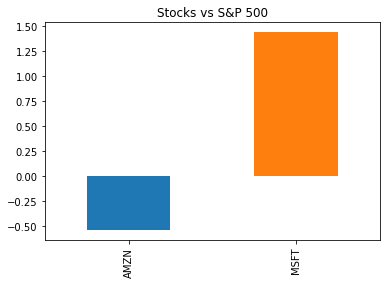

AMZN   -0.540895
MSFT    1.438706
dtype: float64

In [54]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(253)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar()
plt.title('Stocks vs S&P 500')
plt.show()
annual_sharpe_ratio

## Conclusion

In 2019, Amazon had a negative Sharpe ratio as compared to Microsoft. This means that an investment in Amazon returned negative **Sharpe Ratio** compared to the S&P 500 for each unit of risk an investor would have assumed. This negative **Sharpe Ratio** here means that Risk free rate here S&P 500 performed better than Amazon stoke. On the other hand, **Sharpe Ratio** for Microsoft was **1.43** . In other words, in risk-adjusted terms, the investment in Microsoft would have been more attractive.

This difference was mostly driven by differences in low % returns and high standard deviation of amazon  over microsoft.

In netshell, investing in Microsoft would have been resulted better returns for 2019.


## Final words
When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.
